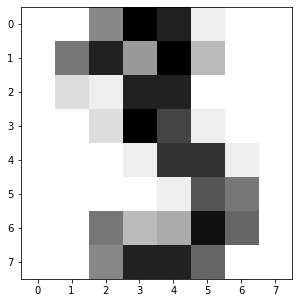

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
이 숫자는  3 입니다.


In [1]:
# 필기 숫자 데이터 시각화 및 타겟(레이블) 출력
from sklearn import datasets
import matplotlib.pyplot as plt

digit = datasets.load_digits()

plt.figure(figsize=(5,5))
plt.imshow(digit.images[3],cmap=plt.cm.gray_r,interpolation='nearest')

plt.show()
print(digit.data[3])
print('이 숫자는 ',digit.target[3],"입니다.")

MNIST 데이터셋은 8x8 픽셀 이미지를 64차원 특징 벡터로 표현한 데이터이다

In [2]:
# 실제 숫자 인식 구현
from sklearn import svm

s = svm.SVC(gamma=0.1,C=10)
s.fit(digit.data,digit.target)

# sample data를 필기 숫자 데이터셋 앞의 3개로 선정 후 인식
new_d = [digit.data[0],digit.data[1],digit.data[2]] # 0, 1, 2
res = s.predict(new_d)
print("예측값은 ",res)
print("실제 값은 ",digit.target[0],digit.target[1],digit.target[2])

예측값은  [0 1 2]
실제 값은  0 1 2


<참고>
sklearn 디자인 패턴

데이터 읽기 -> 모델 객체 생성 -> 모델 학습 -> 에측 -> 성능 평가

In [3]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

# 데이터셋은 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6) # 훈련 데이터셋 비율 60%, 테스트 데이터셋 비울 40%

# SVM을 통해 학습 및 예측
s = svm.SVC(gamma=0.001)
s.fit(x_train,y_train)
res = s.predict(x_test)

# 혼동 행렬 생성
conf = np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# accuracy 측정
not_correct = 0
for i in range(10):
    not_correct+=conf[i][i]
accuracy = not_correct/len(res)
print("accuracy =",accuracy*100)

# cross_val_score을 활용한 교차 검증
accuracies = cross_val_score(s,digit.data,digit.target,cv=5) # 5겹 교차 검증
print(accuracies)
print("정확률(평균)=%0.3f,표춘편차=%0.3f"%(accuracies.mean()*100,accuracies.std()))

[[71.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 64.  0.  0.  0.  0.  1.  0.  1.  1.]
 [ 0.  0. 75.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 69.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 73.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 65.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1. 70.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 76.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 63.  1.]
 [ 0.  0.  0.  0.  0.  2.  0.  1.  0. 82.]]
accuracy = 98.47009735744089
[0.975      0.95       0.98328691 0.99164345 0.96100279]
정확률(평균)=97.219,표춘편차=0.015


In [4]:
# 단일 perceptron을 사용해 필기 숫자 예측
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

# 데이터셋은 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6) # 훈련 데이터셋 비율 60%, 테스트 데이터셋 비울 40%

# SVM을 통해 학습 및 예측
p = Perceptron(max_iter=100,eta0=0.001,verbose=0)
p.fit(x_train,y_train)
res = p.predict(x_test)

# 혼동 행렬 생성
conf = np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# accuracy 측정
not_correct = 0
for i in range(10):
    not_correct+=conf[i][i]
accuracy = not_correct/len(res)
print("accuracy =",accuracy*100)

# cross_val_score을 활용한 교차 검증
accuracies = cross_val_score(p,digit.data,digit.target,cv=5) # 5겹 교차 검증
print(accuracies)
print("정확률(평균)=%0.3f,표춘편차=%0.3f"%(accuracies.mean()*100,accuracies.std()))

[[76.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 58.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0. 66.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0. 73.  0.  0.  0.  1.  2.  4.]
 [ 0.  0.  0.  0. 66.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 65.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 71.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 73.  0.  0.]
 [ 1.  9.  1.  3.  2.  1.  0.  1. 64.  5.]
 [ 0.  1.  0.  2.  0.  1.  0.  1.  0. 63.]]
accuracy = 93.88038942976355
[0.89722222 0.84444444 0.92200557 0.94428969 0.87465181]
정확률(평균)=89.652,표춘편차=0.035


단층 퍼셉트론은 선형 분류기이기 때문에 낮은 정확률을 보여줌
-> XOR 같은 데이터에 대한 처리가 불가능하다

In [5]:
# 다층 perceptron을 활용하여 필기 숫자 예측
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 불러오기 및 훈련 데이터, 테스트 데이터 분할
digit = datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6)

# 다층 perceptron 모델 학습
mlp = MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True) # 은닉층 크기 100
mlp.fit(x_train,y_train)
res = mlp.predict(x_test)

# 혼동 행렬 생성
conf = np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# accuracy 측정
not_correct = 0
for i in range(10):
    not_correct+=conf[i][i]
accuracy = not_correct/len(res)
print("accuracy =",accuracy*100)

# cross_val_score을 활용한 교차 검증
accuracies = cross_val_score(mlp,digit.data,digit.target,cv=5) # 5겹 교차 검증
print(accuracies)
print("정확률(평균)=%0.3f,표춘편차=%0.3f"%(accuracies.mean()*100,accuracies.std()))

Iteration 1, loss = 2.30654803
Iteration 2, loss = 0.34703149
Iteration 3, loss = 0.21573469
Iteration 4, loss = 0.17307793
Iteration 5, loss = 0.13812685
Iteration 6, loss = 0.11947007
Iteration 7, loss = 0.10169609
Iteration 8, loss = 0.08880758
Iteration 9, loss = 0.07829721
Iteration 10, loss = 0.07054250
Iteration 11, loss = 0.06433784
Iteration 12, loss = 0.06181510
Iteration 13, loss = 0.05507726
Iteration 14, loss = 0.04916909
Iteration 15, loss = 0.04912268
Iteration 16, loss = 0.04309750
Iteration 17, loss = 0.03979549
Iteration 18, loss = 0.03672926
Iteration 19, loss = 0.03590550
Iteration 20, loss = 0.03301624
Iteration 21, loss = 0.03299229
Iteration 22, loss = 0.02981045
Iteration 23, loss = 0.02855113
Iteration 24, loss = 0.02647286
Iteration 25, loss = 0.02556942
Iteration 26, loss = 0.02406559
Iteration 27, loss = 0.02273712
Iteration 28, loss = 0.02262932
Iteration 29, loss = 0.02101120
Iteration 30, loss = 0.02034660
Iteration 31, loss = 0.02016324
Iteration 32, los

MLP(다층 퍼셉트론)은 은닉층에서 손실을 줄여나가면서 학습한다.

In [6]:
# MNIST 데이터셋을 활용하여 다층 퍼셉트론으로 필기체 예측
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋 불러오기 및 훈련 집합과 테스트 집합 분할
mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0 # MNIST의 데이터셋은 0~255의 범위값을 가지므로 255로 나눠서 데이터 정규화
x_train = mnist.data[:60000]
y_train = np.int16(mnist.target[:60000])
x_test = mnist.data[60000:]
y_test = np.int16(mnist.target[60000:])

# MLP를 통해 모델 학습
mlp = MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=True)
# 은닉층 노드 100개, 학습률 0.001 verbose=True -> 학습 과정 출력
mlp.fit(x_train,y_train)
res = mlp.predict(x_test)

# 혼동 행렬 생성
conf = np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# accuracy 측정
not_correct = 0
for i in range(10):
    not_correct+=conf[i][i]
accuracy = not_correct/len(res)
print("accuracy =",accuracy*100)

# cross_val_score을 활용한 교차 검증
accuracies = cross_val_score(mlp,mnist.data,mnist.target,cv=5) # 5겹 교차 검증
print(accuracies)
print("정확률(평균)=%0.3f,표춘편차=%0.3f"%(accuracies.mean()*100,accuracies.std()))

Iteration 1, loss = 0.60516375
Iteration 2, loss = 0.25774849
Iteration 3, loss = 0.20522300
Iteration 4, loss = 0.17331639
Iteration 5, loss = 0.14820280
Iteration 6, loss = 0.13033522
Iteration 7, loss = 0.11627765
Iteration 8, loss = 0.10300608
Iteration 9, loss = 0.09320511
Iteration 10, loss = 0.08512833
Iteration 11, loss = 0.07754887
Iteration 12, loss = 0.07161612
Iteration 13, loss = 0.06665915
Iteration 14, loss = 0.06129517
Iteration 15, loss = 0.05612737
Iteration 16, loss = 0.05217271
Iteration 17, loss = 0.04818715
Iteration 18, loss = 0.04510548
Iteration 19, loss = 0.04202745
Iteration 20, loss = 0.03899715
Iteration 21, loss = 0.03607322
Iteration 22, loss = 0.03364264
Iteration 23, loss = 0.03122141
Iteration 24, loss = 0.02892775
Iteration 25, loss = 0.02717587
Iteration 26, loss = 0.02507810
Iteration 27, loss = 0.02364340
Iteration 28, loss = 0.02179907
Iteration 29, loss = 0.02097004
Iteration 30, loss = 0.01923088
Iteration 31, loss = 0.01829394
Iteration 32, los